# Problem Statement
Credit Card Defaulter Prediction
Predict which customer might default in upcoming months. We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn import metrics
from sklearn.metrics  import classification_report,cohen_kappa_score,confusion_matrix,accuracy_score,roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV


from imblearn.over_sampling import SMOTE

#import RFE for feature elimination

from sklearn.feature_selection import RFE
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv('Creditmasterdataset.csv',)
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default
0,20000,female,uni,married,24,m+2,m+2,m-1,m-1,m-2,m-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1284.000000,114.833333,yes
1,120000,female,uni,single,26,m-1,m+2,m+0,m+0,m+0,m+2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,2846.166667,833.333333,yes
2,90000,female,uni,single,34,m+0,m+0,m+0,m+0,m+0,m+0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,16942.166667,1836.333333,no
3,50000,female,uni,married,37,m+0,m+0,m+0,m+0,m+0,m+0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,38555.666667,1398.000000,no
4,50000,male,uni,married,57,m-1,m+0,m-1,m+0,m+0,m+0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,18223.166667,9841.500000,no


In [4]:
print('No of Rows',df.shape[0])
print('No of Columns',df.shape[1])

No of Rows 30000
No of Columns 26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit_limit    30000 non-null  int64  
 1   gender          30000 non-null  object 
 2   education       30000 non-null  object 
 3   marital_status  30000 non-null  object 
 4   age             30000 non-null  int64  
 5   timeliness_1    30000 non-null  object 
 6   timeliness_2    30000 non-null  object 
 7   timeliness_3    30000 non-null  object 
 8   timeliness_4    30000 non-null  object 
 9   timeliness_5    30000 non-null  object 
 10  timeliness_6    30000 non-null  object 
 11  balance_1       30000 non-null  int64  
 12  balance_2       30000 non-null  int64  
 13  balance_3       30000 non-null  int64  
 14  balance_4       30000 non-null  int64  
 15  balance_5       30000 non-null  int64  
 16  balance_6       30000 non-null  int64  
 17  payment_1       30000 non-null 

In [6]:
df.isnull().sum() / len(df) * 100

credit_limit      0.0
gender            0.0
education         0.0
marital_status    0.0
age               0.0
timeliness_1      0.0
timeliness_2      0.0
timeliness_3      0.0
timeliness_4      0.0
timeliness_5      0.0
timeliness_6      0.0
balance_1         0.0
balance_2         0.0
balance_3         0.0
balance_4         0.0
balance_5         0.0
balance_6         0.0
payment_1         0.0
payment_2         0.0
payment_3         0.0
payment_4         0.0
payment_5         0.0
payment_6         0.0
avg_balance       0.0
avg_payment       0.0
default           0.0
dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_limit,30000.0,167484.322667,129747.661567,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
age,30000.0,35.485500,9.217904,21.000000,28.000000,34.000000,41.000000,7.900000e+01
balance_1,30000.0,51223.330900,73635.860576,-165580.000000,3558.750000,22381.500000,67091.000000,9.645110e+05
balance_2,30000.0,49179.075167,71173.768783,-69777.000000,2984.750000,21200.000000,64006.250000,9.839310e+05
balance_3,30000.0,47013.154800,69349.387427,-157264.000000,2666.250000,20088.500000,60164.750000,1.664089e+06
balance_4,30000.0,43262.948967,64332.856134,-170000.000000,2326.750000,19052.000000,54506.000000,8.915860e+05
balance_5,30000.0,40311.400967,60797.155770,-81334.000000,1763.000000,18104.500000,50190.500000,9.271710e+05
balance_6,30000.0,38871.760400,59554.107537,-339603.000000,1256.000000,17071.000000,49198.250000,9.616640e+05
payment_1,30000.0,5663.580500,16563.280354,0.000000,1000.000000,2100.000000,5006.000000,8.735520e+05
payment_2,30000.0,5921.163500,23040.870402,0.000000,833.000000,2009.000000,5000.000000,1.684259e+06


The **average value for the amount of credit card limit is 167484** and **maximum credit_limit 1000000.**
loan has given to those who are working the age limit is 21 to 79 and the **average age is 35.5 years**

In [8]:
for i in df.select_dtypes('object').columns:
    print(i,df[i].nunique())
    print(df[i].value_counts(normalize=True)*100)
    print('=='*10)

gender 2
female    60.373333
male      39.626667
Name: gender, dtype: float64
education 7
uni       46.766667
grad      35.283333
hs        16.390000
other2     0.933333
other1     0.410000
other3     0.170000
0          0.046667
Name: education, dtype: float64
marital_status 4
single     53.213333
married    45.530000
other       1.076667
na          0.180000
Name: marital_status, dtype: float64
timeliness_1 11
m+0    49.123333
m-1    18.953333
m+1    12.293333
m-2     9.196667
m+2     8.890000
m+3     1.073333
m+4     0.253333
m+5     0.086667
m+8     0.063333
m+6     0.036667
m+7     0.030000
Name: timeliness_1, dtype: float64
timeliness_2 11
m+0    52.433333
m-1    20.166667
m+2    13.090000
m-2    12.606667
m+3     1.086667
m+4     0.330000
m+1     0.093333
m+5     0.083333
m+7     0.066667
m+6     0.040000
m+8     0.003333
Name: timeliness_2, dtype: float64
timeliness_3 11
m+0    52.546667
m-1    19.793333
m-2    13.616667
m+2    12.730000
m+3     0.800000
m+4     0.253333
m+7   

In [9]:
df1=df.copy()

## missing values present in marital_status so treating them

In [10]:
display(df1['marital_status'].value_counts())

single     15964
married    13659
other        323
na            54
Name: marital_status, dtype: int64

In [11]:
df1['marital_status']=df['marital_status'].replace('na',np.nan)

In [12]:
df1['marital_status'].fillna(df1['marital_status'].mode()[0],inplace=True)

 Here impute null value to 'single' it has high frequency

In [13]:
df1['education'].replace(to_replace=['other2','other1','other3','0'],value='others',inplace=True)

In [14]:
df1.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default
0,20000,female,uni,married,24,m+2,m+2,m-1,m-1,m-2,m-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1284.000000,114.833333,yes
1,120000,female,uni,single,26,m-1,m+2,m+0,m+0,m+0,m+2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,2846.166667,833.333333,yes
2,90000,female,uni,single,34,m+0,m+0,m+0,m+0,m+0,m+0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,16942.166667,1836.333333,no
3,50000,female,uni,married,37,m+0,m+0,m+0,m+0,m+0,m+0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,38555.666667,1398.000000,no
4,50000,male,uni,married,57,m-1,m+0,m-1,m+0,m+0,m+0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,18223.166667,9841.500000,no


### univariate analysis

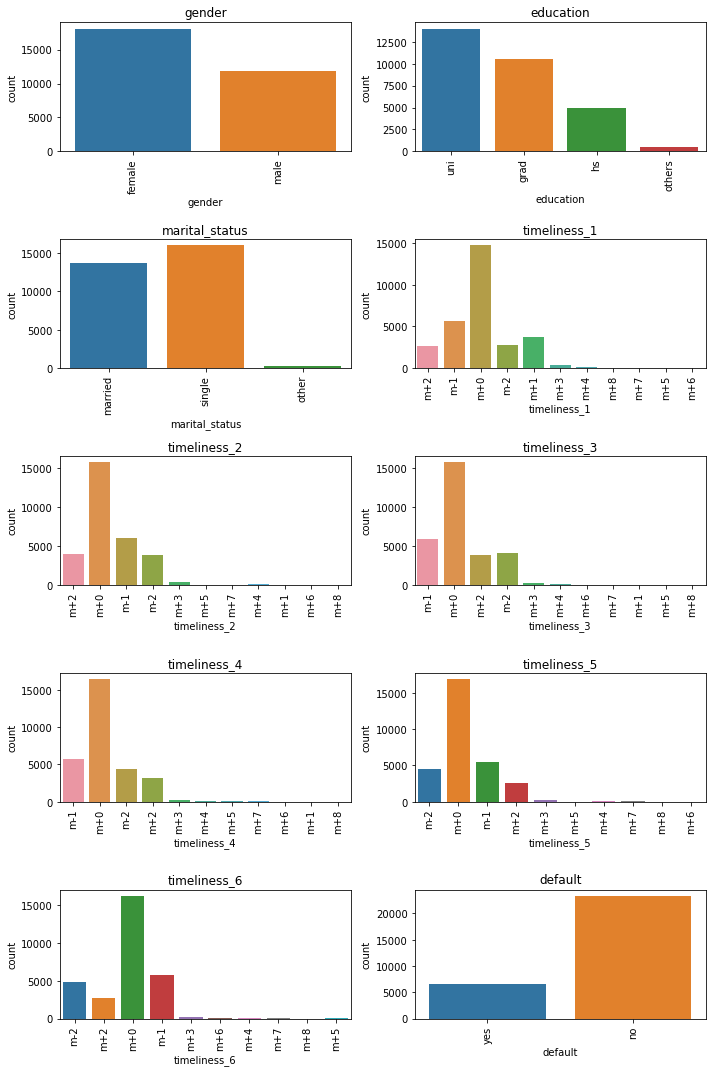

In [15]:
plt.figure(figsize=(10,15))
j=1
for i in df1.select_dtypes('object').columns:
    plt.subplot(5,2,j)
    sns.countplot(df1[i])
    plt.title(i)
    plt.xticks(rotation ='vertical')
    j+=1
    
plt.tight_layout()
plt.show()

In [16]:
# female are more in number
# university member are more
# unmarried person are more

no     77.88
yes    22.12
Name: default, dtype: float64


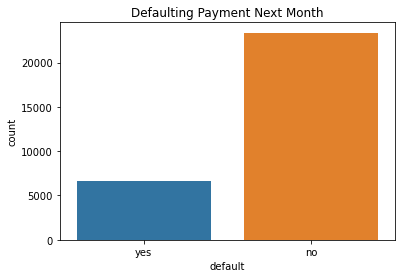

In [17]:
sns.countplot(df.default)
plt.title("Defaulting Payment Next Month")
print(df['default'].value_counts(normalize=True)*100)
plt.show()

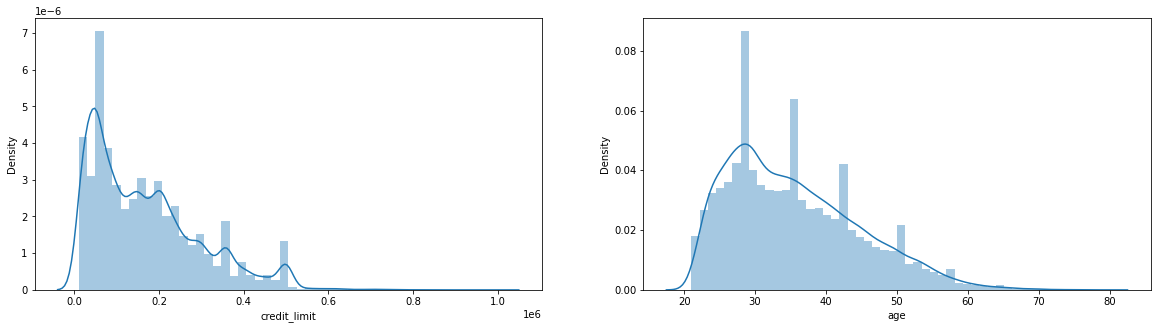

In [18]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df1['credit_limit'])

plt.subplot(122)
sns.distplot(df1['age'])

plt.show()

By plotting the continous variables we observe that dataset consists of skewed data of credit_limit  and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.

### bivariate analysis

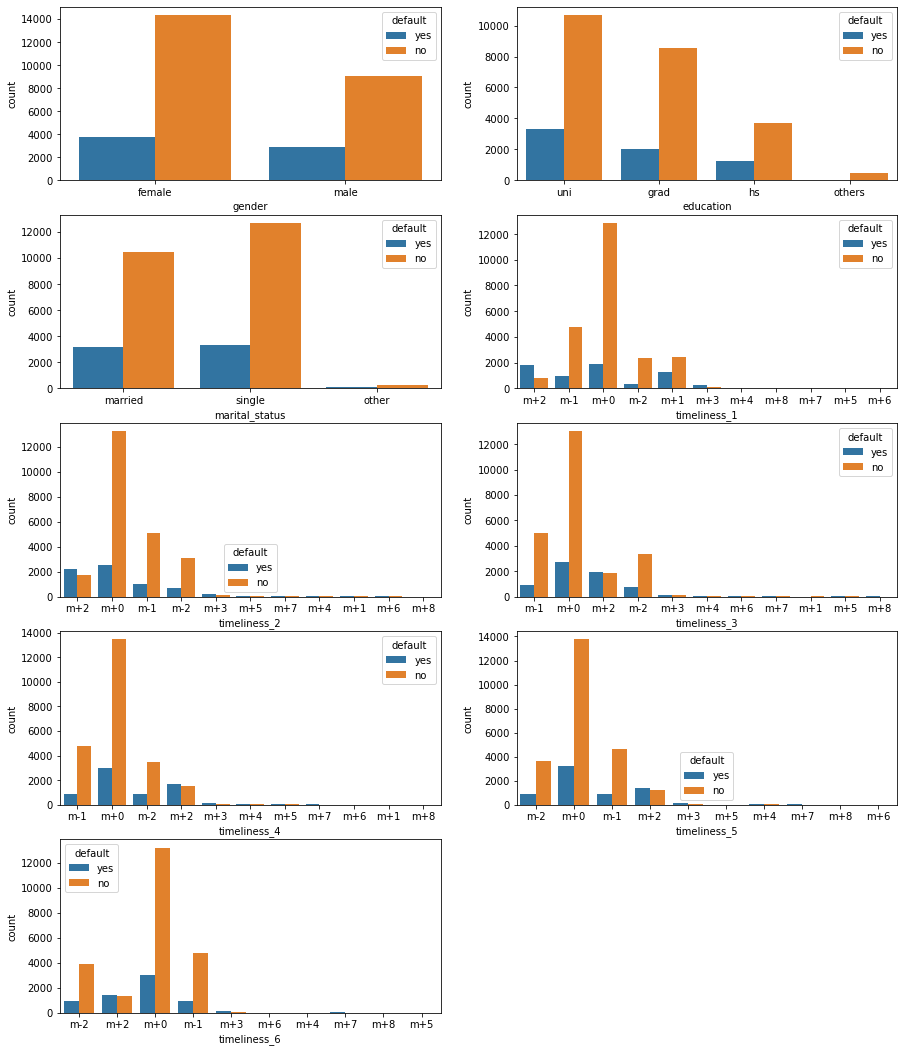

In [19]:
plt.figure(figsize=(15,30))
for i,col in enumerate(df1.select_dtypes(include='object').columns[:-1],1):
    plt.subplot(8,2,i)
    sns.countplot(x=df1[col],hue=df["default"])
    plt.xlabel(col)
plt.show()

In [20]:
def create_stacked_bar(col):
    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df1['default'],columns = df1[col], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "default_no"
    list2_name = "default_yes"
    title = f"Default by {col}"
    xlabel = col
    ylabel = "Default Percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=0)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

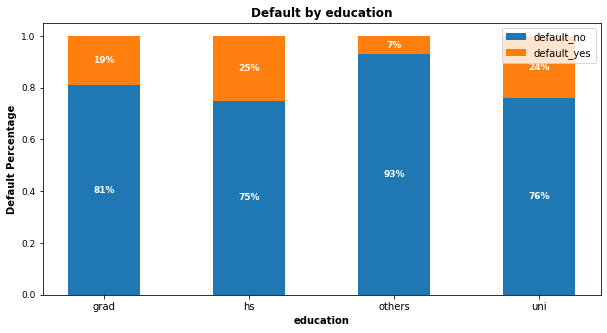

In [21]:
create_stacked_bar('education')

In [22]:
# bins = [20,30,40,50,60,70,80]
# names = ['21-30','31-40','41-50','51-60','61-70','71-80']
# df1['AGE_BIN'] = pd.cut(x=df1.age, bins=bins, labels=names, right=True)

# age_cnt = df1.AGE_BIN.value_counts()
# age_0 = (df1.AGE_BIN[df1['default'] == 0].value_counts())
# age_1 = (df1.AGE_BIN[df1['default'] == 1].value_counts())

# plt.subplots(figsize=(8,5))
# sns.barplot(data=df1, x='AGE_BIN', y='credit_limit', hue='default', ci=0)
# plt.bar(age_0.index, age_0.values)
# plt.bar(age_1.index, age_1.values)
# for x,y in zip(names,age_0):
#     plt.text(x,y,y,fontsize=12)
# for x,y in zip(names,age_1):
#     plt.text(x,y,y,fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.title("Number of clients in each age group", fontsize=15)
# plt.legend(loc='upper right', fontsize=15)
# plt.show()

In [ ]:
# Null : Data has Equal Variance   / Var is Equal 
# Altr : Data has un-equal variance / Var is not Equal

In [ ]:
# stats.levene(sample1,sample2.....sample-n)

In [ ]:
stats.levene(df['Salary'],df['Age'])

In [ ]:
# Since P_VALUE is less than Sig_level we reject the null hypothesis and concluding that the data doesn't have equal variance.

# stat test--) num vs cat(=2)

### credit_limit vs default

In [23]:
# Null : Data is normal
# Altr : Data is not normal

In [24]:
credit_limit_yes= df1[df1['default']=='yes']['credit_limit']
credit_limit_no= df1[df1['default']=='no']['credit_limit']

In [25]:
stats.shapiro(df1['credit_limit'])

ShapiroResult(statistic=0.9073493480682373, pvalue=0.0)

In [26]:
# Since p_value is less than sig_level so we reject the null hypothesis we conclude data is not normal.

In [27]:
## Non - Parametric Test +-

In [28]:
# Null : credit_limit & default are Independent
# ALTR : credit_limit & default are Dependent

In [29]:
stats.mannwhitneyu(credit_limit_no,credit_limit_yes)

MannwhitneyuResult(statistic=95786286.5, pvalue=1.2255485818223303e-189)

In [30]:
#Since P_val is less tan the sig_level we reject the null hypothesis and concluding that
#the credit_limit & default are dependent.

### age vs default

In [31]:
# Null : Data is normal
# Altr : Data is not normal

In [32]:
stats.shapiro(df1['age'])

ShapiroResult(statistic=0.9499877691268921, pvalue=0.0)

In [33]:
# Since p_value is less than sig_level we conclude data is not normal.

In [34]:
## Non - Parametric Test 

# Null : age & default are Independent
# ALTR : age & default are Dependent

In [35]:
age_default_yes= df1[df1['default']=='yes']['age']
age_default_no= df1[df1['default']=='no']['age']

In [36]:
stats.mannwhitneyu(age_default_no,age_default_yes)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.3725035434898616)

In [37]:
# Since p_value is greater than the sig_level we fail to reject null hypothesis and concluding that
# the age & default are independent

### balance vs default

balance_1,balance_2	,balance_3,balance_4,balance_5,balance_6

In [38]:
# Null : Data is normal
# Altr : Data is not normal

In [39]:
balance=['balance_1','balance_2','balance_3','balance_4','balance_5','balance_6']
for i in balance:
    print(i,stats.shapiro(df1[i]))

balance_1 ShapiroResult(statistic=0.6974822282791138, pvalue=0.0)
balance_2 ShapiroResult(statistic=0.6953327059745789, pvalue=0.0)
balance_3 ShapiroResult(statistic=0.6818559765815735, pvalue=0.0)
balance_4 ShapiroResult(statistic=0.6816972494125366, pvalue=0.0)
balance_5 ShapiroResult(statistic=0.6766496896743774, pvalue=0.0)
balance_6 ShapiroResult(statistic=0.6759445667266846, pvalue=0.0)


In [40]:
# Since p_value is less than sig_level we conclude that data is not normal
#for all balance_1,balance_2,balance_3,balance_4,balance_5,balance_6

In [41]:
## Non - Parametric Test 

# Null : balance_1,2,3,4,5,6 & default are Independent
# ALTR : balance_1,2,3,4,5,6 & default are Dependent

In [42]:
for i in balance:
    default_yes=df1[df1['default']=='yes'][i]
    default_no=df1[df1['default']=='no'][i]
    print(i,stats.mannwhitneyu(default_yes,default_no))

balance_1 MannwhitneyuResult(statistic=74791058.5, pvalue=1.1510381825298247e-05)
balance_2 MannwhitneyuResult(statistic=75845011.0, pvalue=0.007061205045571093)
balance_3 MannwhitneyuResult(statistic=76156098.5, pvalue=0.028202701361998515)
balance_4 MannwhitneyuResult(statistic=76621117.5, pvalue=0.14776781853794307)
balance_5 MannwhitneyuResult(statistic=76783544.0, pvalue=0.23536702261617015)
balance_6 MannwhitneyuResult(statistic=77513553.0, pvalue=0.9894808402783662)


In [43]:
# Since p_value is less than the sig_level we reject null hypothesis and concluding that
# the balance_1 & default are dependent.

In [44]:
# Since p_value is greater than the sig_level we fail to reject null hypothesis and concluding that
# the balance_2,3,4,5,6 & default are independent

### payment vs default

payment_1,payment_2,payment_3,payment_4,payment_5,payment_6

In [45]:
# Null : Data is normal
# Altr : Data is not normal

In [46]:
payment=['payment_1','payment_2','payment_3','payment_4','payment_5','payment_6']
for i in payment:
    print(i,stats.shapiro(df1[i]))

payment_1 ShapiroResult(statistic=0.2652016282081604, pvalue=0.0)
payment_2 ShapiroResult(statistic=0.17241019010543823, pvalue=0.0)
payment_3 ShapiroResult(statistic=0.2318122386932373, pvalue=0.0)
payment_4 ShapiroResult(statistic=0.25600308179855347, pvalue=0.0)
payment_5 ShapiroResult(statistic=0.26412832736968994, pvalue=0.0)
payment_6 ShapiroResult(statistic=0.251467764377594, pvalue=0.0)


In [47]:
# Since p_value is less than sig_level we conclude that data is not normal
#for all payment_1,payment_2,payment_3,payment_4,payment_5,payment_6

In [48]:
## Non - Parametric Test 

# Null : payment_1,2,3,4,5,6 & default are Independent
# ALTR : payment_1,2,3,4,5,6 & default are Dependent

In [49]:
for i in payment:
    default_yes=df[df1['default']=='yes'][i]
    default_no=df[df1['default']=='no'][i]
    print(i,stats.mannwhitneyu(default_yes,default_no))

payment_1 MannwhitneyuResult(statistic=60262771.0, pvalue=4.616659199185981e-170)
payment_2 MannwhitneyuResult(statistic=61289748.0, pvalue=9.954975969253173e-151)
payment_3 MannwhitneyuResult(statistic=62551544.5, pvalue=8.992708492430757e-129)
payment_4 MannwhitneyuResult(statistic=63790208.5, pvalue=7.284694665069206e-109)
payment_5 MannwhitneyuResult(statistic=65021456.0, pvalue=1.1248698832662903e-90)
payment_6 MannwhitneyuResult(statistic=64517205.0, pvalue=3.1841165363473415e-98)


In [50]:
# Since p_value is less than the sig_level we reject null hypothesis and concluding that
# the balance_1,2,3,4,5,6 & default are dependent.

## stat test--) cat vs cat

### gender vs default

In [51]:
# Null : gender vs default are Independent / gender has no impact on default

# ALTR : gender vs default are Dependent / gender has Impact on default

In [52]:
test_stat,P_value,Degrees_of_freedom,Exp_values = stats.chi2_contingency(pd.crosstab(df1['gender'],df1['default']))
P_value

4.944678999412026e-12

In [53]:
# Since P_val is less than the sig_level we reject the null hypothesis and conclude that 
# the gender has an impact on default.

### education vs default

In [54]:
# Null : education vs default are Independent / education has no impact on default

# ALTR : education vs default are Dependent / education has Impact on default

In [55]:
test_stat,P_value,Degrees_of_freedom,Exp_values = stats.chi2_contingency(pd.crosstab(df1['education'],df1['default']))
P_value

1.4950645648106153e-34

In [56]:
# Since P_val is less than the sig_level we reject the null hypothesis and conclude that 
# the education has an impact on default.

### marital_status vs default

In [57]:
# Null : marital_status vs default are Independent / marital_status has no impact on default

# ALTR : marital_status vs default are Dependent / marital_status has Impact on default

In [58]:
test_stat,P_value,Degrees_of_freedom,Exp_values = stats.chi2_contingency(pd.crosstab(df1['marital_status'],df1['default']))
P_value

1.5126419390778658e-07

In [59]:
# Since P_val is less than the sig_level we reject the null hypothesis and conclude that 
# the marital_status has an impact on default.

In [60]:
df2=df1.copy()

# EDA

In [61]:
df2['default'].replace({'yes' : 1 , 'no' : 0},inplace=True)

In [62]:
#'education'(1=graduate school; 2=university; 3=high school; 4=others) is used for encoding.
df2['education'].replace(to_replace=['grad','uni','hs','others'],value=[1,2,3,4],inplace=True)

In [63]:
# from sklearn.preprocessing import OrdinalEncoder
# df2['education']=OrdinalEncoder(categories=[['others','hs','grad','uni']]).fit_transform(df2['education'].values.reshape(-1,1))

In [64]:
#replaceing the timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6

In [65]:
#replacing the prefix from timeline feature
df2.replace(to_replace=['m+8', 'm+7', 'm+6', 'm+5', 'm+4', 'm+3', 'm+2', 'm+1', 'm+0', 'm-1', 'm-2'],value=[8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2], inplace=True)

In [66]:
# 'gender'(1=male; 0=female) is used for encoding.
df2['gender'].replace({'male' : 1, 'female' : 0},inplace=True)

In [67]:
# 'marital_status'(1=married; 2=single; 3=other) is used for encoding.
df2['marital_status'].replace(to_replace=['married','single','other'],value=[1,2,3],inplace=True)

In [68]:
df2['timeliness'] = df2['timeliness_1'] + df2['timeliness_2'] + df2['timeliness_3'] + df2['timeliness_4'] + df2['timeliness_5'] + df2['timeliness_1']

In [69]:
def zero(x):
    if x<=0:
        return 0
    else:
        return 1

In [70]:
df2['timeliness']=df2["timeliness"].map(zero)

In [71]:
x1=df2[['timeliness_1','timeliness_2','timeliness_3','timeliness_4','timeliness_5','timeliness_6','timeliness']]

In [72]:
x1.corr()

,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6,timeliness
timeliness_1,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.613439
timeliness_2,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.626183
timeliness_3,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.615330
timeliness_4,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.578025
timeliness_5,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.538692
timeliness_6,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.460831
timeliness,0.613439,0.626183,0.615330,0.578025,0.538692,0.460831,1.000000


In [73]:
x2=df2[['balance_1','balance_2','balance_3','balance_4','balance_5','balance_6','avg_balance']]

In [74]:
x2.corr()

,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,avg_balance
balance_1,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.940100
balance_2,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.961178
balance_3,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.961958
balance_4,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.964501
balance_5,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.951676
balance_6,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.928720
avg_balance,0.940100,0.961178,0.961958,0.964501,0.951676,0.928720,1.000000


In [75]:
x3=df2[['payment_1','payment_2','payment_3','payment_4','payment_5','payment_6','avg_payment']]

In [76]:
x3.corr()

,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_payment
payment_1,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,0.596438
payment_2,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,0.665297
payment_3,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740,0.594111
payment_4,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834,0.526993
payment_5,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896,0.490584
payment_6,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000,0.529207
avg_payment,0.596438,0.665297,0.594111,0.526993,0.490584,0.529207,1.000000


In [77]:
df2.head()

,credit_limit,gender,education,marital_status,age,timeliness_1,timeliness_2,timeliness_3,timeliness_4,timeliness_5,timeliness_6,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,payment_1,payment_2,payment_3,payment_4,payment_5,payment_6,avg_balance,avg_payment,default,timeliness
0,20000,0,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1284.000000,114.833333,1,1
1,120000,0,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,2846.166667,833.333333,1,0
2,90000,0,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,16942.166667,1836.333333,0,0
3,50000,0,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,38555.666667,1398.000000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,18223.166667,9841.500000,0,0


In [78]:
df3=df2.drop(labels=['timeliness_1','timeliness_2','timeliness_3','timeliness_4','timeliness_5','timeliness_6',
                    'balance_1','balance_2','balance_3','balance_4','balance_5','balance_6','payment_1','payment_2',
                    'payment_3','payment_4','payment_5','payment_6'],axis=1)

In [79]:
df3.sample(10)

,credit_limit,gender,education,marital_status,age,avg_balance,avg_payment,default,timeliness
18299,210000,0,3,1,40,108047.000000,3714.833333,0,0
15566,50000,1,3,2,40,36482.833333,2750.000000,1,0
22066,160000,0,1,2,26,5480.166667,3254.000000,0,0
4828,90000,0,1,2,28,61419.000000,15583.333333,0,0
28968,230000,0,1,2,35,25.000000,50.000000,0,0
4810,300000,0,1,2,31,21564.666667,6722.166667,0,0
18405,230000,0,1,2,23,21360.166667,1171.833333,0,0
8803,10000,1,2,2,28,7257.500000,747.500000,0,1
10349,20000,1,1,1,35,5270.166667,1649.166667,1,0
18332,310000,0,1,1,36,170494.833333,7801.500000,0,0


In [80]:
X=df3.drop(labels=['default'],axis=1)
y=df3['default']

In [81]:
print('X.shape',X.shape)
print('y_shape',y.shape)

X.shape (30000, 8)
y_shape (30000,)


In [82]:
X_train,X_test,y_train,y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)

In [83]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (24000, 8)
X_test (6000, 8)
y_train (24000,)
y_test (6000,)


# Function

In [84]:
score_card = pd.DataFrame(columns=['Model Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'f1-score'])
def update_score_card (model, y_test,y_pred):
    global score_card

    score_card=score_card.append({'Model Name': model,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

# DecisionTree

In [85]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
decision_tree = decision_tree_classification.fit(X_train, y_train)
train_pred = decision_tree.predict(X_train)
test_pred = decision_tree.predict(X_test)

update_score_card('Decision Tree_train', y_train,train_pred)
update_score_card('Decision Tree_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18678
           1       1.00      1.00      1.00      5322

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

TEST REPORT:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      4686
           1       0.34      0.36      0.35      1314

    accuracy                           0.71      6000
   macro avg       0.58      0.58      0.58      6000
weighted avg       0.71      0.71      0.71      6000



# RandomForest

In [86]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

update_score_card('RandomForest_train', y_train,train_pred)
update_score_card('RandomForest_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18678
           1       1.00      1.00      1.00      5322

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

TEST REPORT:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      4686
           1       0.51      0.32      0.39      1314

    accuracy                           0.78      6000
   macro avg       0.67      0.62      0.63      6000
weighted avg       0.76      0.78      0.76      6000



# AdaBoost

In [87]:
adaboost = AdaBoostClassifier(n_estimators = 300, random_state = 42)
ada_model=adaboost.fit(X_train, y_train)

train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(X_test)

update_score_card('AdaBoost_train', y_train,train_pred)
update_score_card('AdaBoost_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     18678
           1       0.56      0.30      0.39      5322

    accuracy                           0.79     24000
   macro avg       0.69      0.62      0.63     24000
weighted avg       0.77      0.79      0.77     24000

TEST REPORT:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      4686
           1       0.51      0.28      0.36      1314

    accuracy                           0.78      6000
   macro avg       0.67      0.60      0.62      6000
weighted avg       0.75      0.78      0.76      6000



# GradientBoost

In [88]:
gboost = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 142)
gboost_model=gboost.fit(X_train, y_train)

train_pred = gboost_model.predict(X_train)
test_pred = gboost_model.predict(X_test)

update_score_card('GradientBoost_train', y_train,train_pred)
update_score_card('GradientBoost_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     18678
           1       0.98      0.78      0.87      5322

    accuracy                           0.95     24000
   macro avg       0.96      0.89      0.92     24000
weighted avg       0.95      0.95      0.95     24000

TEST REPORT:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      4686
           1       0.50      0.32      0.39      1314

    accuracy                           0.78      6000
   macro avg       0.66      0.62      0.63      6000
weighted avg       0.76      0.78      0.76      6000



# XGBoost

In [89]:
xgb = XGBClassifier(max_depth = 10, gamma = 1,)
xgb_model=xgb.fit(X_train, y_train)

train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

update_score_card('XGB_train', y_train,train_pred)
update_score_card('XGB_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     18678
           1       0.93      0.66      0.77      5322

    accuracy                           0.91     24000
   macro avg       0.92      0.82      0.86     24000
weighted avg       0.91      0.91      0.91     24000

TEST REPORT:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      4686
           1       0.49      0.30      0.38      1314

    accuracy                           0.78      6000
   macro avg       0.66      0.61      0.62      6000
weighted avg       0.75      0.78      0.76      6000



# KNN

In [90]:
KNN = KNeighborsClassifier(n_neighbors = 3)
knn_model = KNN.fit(X_train,y_train)

train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)

update_score_card('KNN_train', y_train,train_pred)
update_score_card('KNN_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     18678
           1       0.72      0.47      0.57      5322

    accuracy                           0.84     24000
   macro avg       0.79      0.71      0.74     24000
weighted avg       0.83      0.84      0.83     24000

TEST REPORT:
               precision    recall  f1-score   support

           0       0.80      0.88      0.83      4686
           1       0.31      0.19      0.24      1314

    accuracy                           0.73      6000
   macro avg       0.55      0.54      0.54      6000
weighted avg       0.69      0.73      0.70      6000



In [91]:
score_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree_train,0.998027,1.0,0.996054,0.999125,0.998023
1,Decision Tree_test,0.583936,0.342407,0.363775,0.707667,0.352768
2,RandomForest_train,0.99843,0.998871,0.997182,0.999125,0.998025
3,RandomForest_test,0.615722,0.510429,0.316591,0.783833,0.390794
4,AdaBoost_train,0.617867,0.55762,0.304585,0.792208,0.393973
5,AdaBoost_test,0.603507,0.512431,0.282344,0.784,0.364082
6,GradientBoost_train,0.890272,0.981895,0.784667,0.949042,0.872272
7,GradientBoost_test,0.615277,0.5,0.320396,0.781,0.390538
8,XGB_train,0.821127,0.926603,0.657084,0.912417,0.768909
9,XGB_test,0.607546,0.490172,0.303653,0.778333,0.375


# Random Forest doing well

# SMOTE 60%

X_train (24000, 8)
X_test (6000, 8)
y_train (24000,)
y_test (6000,)
SMOTE (37382, 8) (37382,)


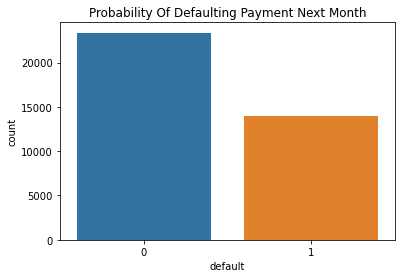

In [92]:
X=df3.drop(labels='default',axis=1,inplace=False)
y=df3['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

ros=RandomOverSampler(sampling_strategy=.60)
X_ros,y_ros=ros.fit_resample(X,y)
print('SMOTE',X_ros.shape,y_ros.shape)
sns.countplot(y_ros)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=12)
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (29905, 8)
X_test (7477, 8)
y_train (29905,)
y_test (7477,)


In [94]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

update_score_card('RandomForest_train', y_train,train_pred)
update_score_card('RandomForest_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18644
           1       1.00      1.00      1.00     11261

    accuracy                           1.00     29905
   macro avg       1.00      1.00      1.00     29905
weighted avg       1.00      1.00      1.00     29905

TEST REPORT:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      4720
           1       0.81      0.87      0.84      2757

    accuracy                           0.88      7477
   macro avg       0.86      0.87      0.87      7477
weighted avg       0.88      0.88      0.88      7477



# SMOTE 75%

X_train (24000, 8)
X_test (6000, 8)
y_train (24000,)
y_test (6000,)
SMOTE (40887, 8) (40887,)


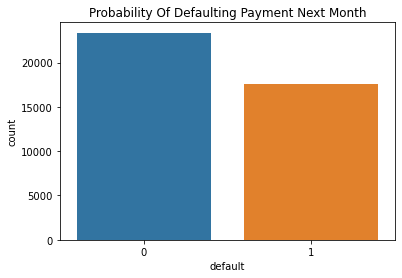

In [95]:
X=df3.drop(labels='default',axis=1,inplace=False)
y=df3['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

ros=RandomOverSampler(sampling_strategy=.75)
X_ros,y_ros=ros.fit_resample(X,y)
print('SMOTE',X_ros.shape,y_ros.shape)
sns.countplot(y_ros)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=12)
plt.show()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (32709, 8)
X_test (8178, 8)
y_train (32709,)
y_test (8178,)


In [97]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

update_score_card('RandomForest_train', y_train,train_pred)
update_score_card('RandomForest_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4645
           1       0.85      0.92      0.88      3533

    accuracy                           0.89      8178
   macro avg       0.89      0.90      0.89      8178
weighted avg       0.90      0.89      0.89      8178



# SMOTE 80%

X_train (24000, 8)
X_test (6000, 8)
y_train (24000,)
y_test (6000,)
SMOTE (42055, 8) (42055,)


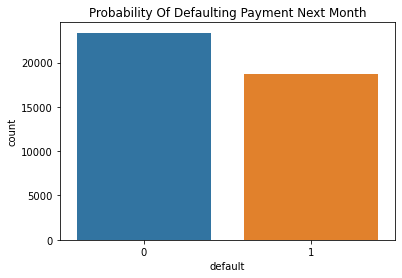

In [98]:
X=df3.drop(labels='default',axis=1,inplace=False)
y=df3['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

ros=RandomOverSampler(sampling_strategy=.80)
X_ros,y_ros=ros.fit_resample(X,y)
print('SMOTE',X_ros.shape,y_ros.shape)
sns.countplot(y_ros)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=12)
plt.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (33644, 8)
X_test (8411, 8)
y_train (33644,)
y_test (8411,)


In [100]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

update_score_card('RandomForest_train', y_train,train_pred)
update_score_card('RandomForest_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18714
           1       1.00      1.00      1.00     14930

    accuracy                           1.00     33644
   macro avg       1.00      1.00      1.00     33644
weighted avg       1.00      1.00      1.00     33644

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4650
           1       0.85      0.93      0.88      3761

    accuracy                           0.89      8411
   macro avg       0.89      0.90      0.89      8411
weighted avg       0.90      0.89      0.89      8411



# SMOTE 100%

X_train (24000, 8)
X_test (6000, 8)
y_train (24000,)
y_test (6000,)
SMOTE (46728, 8) (46728,)


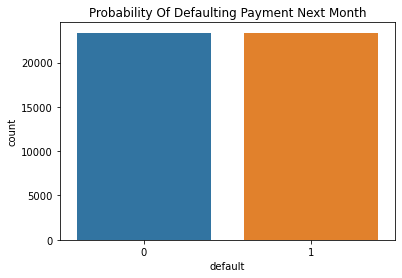

In [101]:
X=df3.drop(labels='default',axis=1,inplace=False)
y=df3['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

ros=RandomOverSampler(sampling_strategy=1)
X_ros,y_ros=ros.fit_resample(X,y)
print('SMOTE',X_ros.shape,y_ros.shape)
sns.countplot(y_ros)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=12)
plt.show()

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (37382, 8)
X_test (9346, 8)
y_train (37382,)
y_test (9346,)


In [103]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

update_score_card('RandomForest_train', y_train,train_pred)
update_score_card('RandomForest_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18698
           1       1.00      1.00      1.00     18684

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382

TEST REPORT:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      4666
           1       0.87      0.97      0.91      4680

    accuracy                           0.91      9346
   macro avg       0.91      0.91      0.91      9346
weighted avg       0.91      0.91      0.91      9346



# Smote 75% function

In [104]:
sscore_card = pd.DataFrame(columns=['Model Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'f1-score'])
def update_sscore_card (model, y_test,y_pred):
    global sscore_card

    sscore_card=sscore_card.append({'Model Name': model,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

# Taking smote 75%

X_train (24000, 8)
X_test (6000, 8)
y_train (24000,)
y_test (6000,)
SMOTE (40887, 8) (40887,)


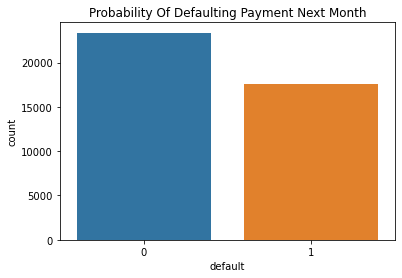

In [105]:
X=df3.drop(labels='default',axis=1,inplace=False)
y=df3['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

ros=RandomOverSampler(sampling_strategy=.75)
X_ros,y_ros=ros.fit_resample(X,y)
print('SMOTE',X_ros.shape,y_ros.shape)
sns.countplot(y_ros)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=12)
plt.show()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=42)

In [107]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
decision_tree = decision_tree_classification.fit(X_train, y_train)
train_pred = decision_tree.predict(X_train)
test_pred = decision_tree.predict(X_test)

update_sscore_card('Decision Tree_train SMOTE 75', y_train,train_pred)
update_sscore_card('Decision Tree_test SMOTE 75 ', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      4645
           1       0.77      0.91      0.83      3533

    accuracy                           0.84      8178
   macro avg       0.85      0.85      0.84      8178
weighted avg       0.86      0.84      0.84      8178



TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4645
           1       0.84      0.92      0.88      3533

    accuracy                           0.89      8178
   macro avg       0.89      0.89      0.89      8178
weighted avg       0.89      0.89      0.89      8178

KNN CLASSIFIER:


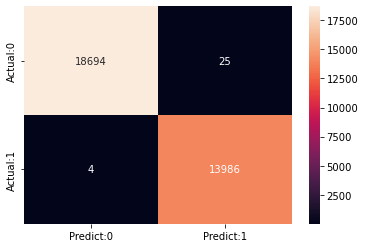

In [108]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

update_sscore_card('RandomForest_train SMOTE 75', y_train,train_pred)
update_sscore_card('RandomForest_test SMOTE 75', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))



cm= confusion_matrix(y_train,train_pred)
print("KNN CLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

In [109]:
adaboost = AdaBoostClassifier(n_estimators = 300, random_state = 42)
ada_model=adaboost.fit(X_train, y_train)

train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(X_test)

update_sscore_card('AdaBoost_train SMOTE 75', y_train,train_pred)
update_sscore_card('AdaBoost_test SMOTE 75', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77     18719
           1       0.71      0.60      0.65     13990

    accuracy                           0.72     32709
   macro avg       0.72      0.71      0.71     32709
weighted avg       0.72      0.72      0.72     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.73      0.81      0.76      4645
           1       0.70      0.60      0.65      3533

    accuracy                           0.72      8178
   macro avg       0.71      0.70      0.71      8178
weighted avg       0.72      0.72      0.71      8178



In [110]:
gboost = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 142)
gboost_model=gboost.fit(X_train, y_train)

train_pred = gboost_model.predict(X_train)
test_pred = gboost_model.predict(X_test)

update_sscore_card('GradientBoost_train SMOTE 75', y_train,train_pred)
update_sscore_card('GradientBoost_test SMOTE 75', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     18719
           1       0.94      0.91      0.92     13990

    accuracy                           0.94     32709
   macro avg       0.94      0.93      0.93     32709
weighted avg       0.94      0.94      0.94     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4645
           1       0.80      0.81      0.81      3533

    accuracy                           0.83      8178
   macro avg       0.83      0.83      0.83      8178
weighted avg       0.83      0.83      0.83      8178



In [111]:
xgb = XGBClassifier(max_depth = 10, gamma = 1,)
xgb_model=xgb.fit(X_train, y_train)

train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

update_sscore_card('XGB_train SMOTE 75', y_train,train_pred)
update_sscore_card('XGB_test SMOTE 75', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     18719
           1       0.92      0.92      0.92     13990

    accuracy                           0.94     32709
   macro avg       0.93      0.93      0.93     32709
weighted avg       0.94      0.94      0.94     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4645
           1       0.79      0.81      0.80      3533

    accuracy                           0.83      8178
   macro avg       0.82      0.82      0.82      8178
weighted avg       0.83      0.83      0.83      8178



In [112]:
KNN = KNeighborsClassifier(n_neighbors = 3)
knn_model = KNN.fit(X_train,y_train)

train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)

update_sscore_card('KNN_train SMOTE 75', y_train,train_pred)
update_sscore_card('KNN_test SMOTE 75', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88     18719
           1       0.80      0.93      0.86     13990

    accuracy                           0.87     32709
   macro avg       0.87      0.88      0.87     32709
weighted avg       0.88      0.87      0.87     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.79      0.67      0.73      4645
           1       0.64      0.77      0.70      3533

    accuracy                           0.71      8178
   macro avg       0.72      0.72      0.71      8178
weighted avg       0.73      0.71      0.72      8178



In [113]:
model_1=RandomForestClassifier(random_state=1)
model_2=XGBClassifier(random_state=10)
model_3=KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
last=LogisticRegression()

In [114]:
# !pip install mlxtend

In [115]:
from mlxtend.classifier import StackingClassifier
stack=StackingClassifier(classifiers=[model_1,model_2,model_3],meta_classifier=last)

In [116]:
stack_model=stack.fit(X_train,y_train)
train_pred = stack_model.predict(X_train)
test_pred = stack_model.predict(X_test)


update_sscore_card('stacking_train ', y_train,train_pred)
update_sscore_card('stacking_test', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4645
           1       0.84      0.92      0.88      3533

    accuracy                           0.89      8178
   macro avg       0.89      0.89      0.89      8178
weighted avg       0.89      0.89      0.89      8178



KNN CLASSIFIER:


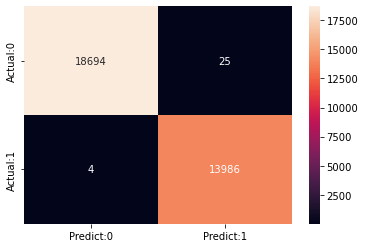

In [117]:
cm= confusion_matrix(y_train,train_pred)
print("KNN CLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

In [118]:
sscore_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Decision Tree_train SMOTE 75,0.999153,0.9985,0.999428,0.999113,0.998964
1,Decision Tree_test SMOTE 75,0.851816,0.768278,0.913105,0.843483,0.834454
2,RandomForest_train SMOTE 75,0.999189,0.998216,0.999714,0.999113,0.998964
3,RandomForest_test SMOTE 75,0.894542,0.842979,0.919332,0.891171,0.879502
4,AdaBoost_train SMOTE 75,0.709217,0.70862,0.604074,0.724418,0.652184
5,AdaBoost_test SMOTE 75,0.703026,0.703803,0.597226,0.717413,0.646149
6,GradientBoost_train SMOTE 75,0.932865,0.94198,0.907505,0.936531,0.924421
7,GradientBoost_test SMOTE 75,0.83146,0.804537,0.81319,0.833945,0.80884
8,XGB_train SMOTE 75,0.934008,0.924325,0.924589,0.935369,0.924457
9,XGB_test SMOTE 75,0.82378,0.792673,0.808378,0.825874,0.800448


In [119]:
bestscore_card = pd.DataFrame(columns=['Model Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'f1-score'])
def update_bestscore_card (model, y_test,y_pred):
    global bestscore_card

    bestscore_card=bestscore_card.append({'Model Name': model,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

# Random Forest is best model

In [120]:
# initiate linear regression model to use in feature selection
rf = RandomForestClassifier()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=rf, n_features_to_select =6)

# fit the RFE model on the training dataset using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['credit_limit', 'education', 'age', 'avg_balance', 'avg_payment',
       'timeliness'],
      dtype='object')


In [121]:
X_train7=X_train[['credit_limit', 'education', 'marital_status','age', 'avg_balance', 'avg_payment','timeliness']]#with 7 feature
X_test7=X_test[['credit_limit','education', 'marital_status' ,'age', 'avg_balance', 'avg_payment','timeliness']]#7


print('X_train',X_train7.shape)
print('X_test',X_test7.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

print('=='*10)

X_train6=X_train[['credit_limit', 'education', 'age', 'avg_balance', 'avg_payment','timeliness']] #6
X_test6=X_test [['credit_limit', 'education', 'age', 'avg_balance', 'avg_payment','timeliness']]

print('X_train',X_train6.shape)
print('X_test',X_test6.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (32709, 7)
X_test (8178, 7)
y_train (32709,)
y_test (8178,)
X_train (32709, 6)
X_test (8178, 6)
y_train (32709,)
y_test (8178,)


TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4645
           1       0.85      0.92      0.88      3533

    accuracy                           0.89      8178
   macro avg       0.89      0.90      0.89      8178
weighted avg       0.90      0.89      0.89      8178

KNN CLASSIFIER:


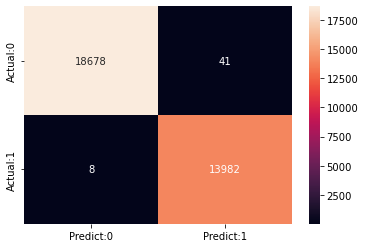

In [122]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train7, y_train)
train_pred = rf_model.predict(X_train7)
test_pred = rf_model.predict(X_test7)

update_bestscore_card('RandomForest_train_with 7 feature', y_train,train_pred)
update_bestscore_card('RandomForest_test_with 7 feature', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))



cm= confusion_matrix(y_train,train_pred)
print("KNN CLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4645
           1       0.84      0.92      0.88      3533

    accuracy                           0.89      8178
   macro avg       0.89      0.89      0.89      8178
weighted avg       0.89      0.89      0.89      8178



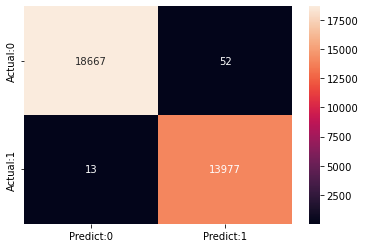

In [123]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train6, y_train)
train_pred = rf_model.predict(X_train6)
test_pred = rf_model.predict(X_test6)

update_bestscore_card('RandomForest_train_with 6 feature', y_train,train_pred)
update_bestscore_card('RandomForest_test_with 6 feature', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))



cm= confusion_matrix(y_train,train_pred)
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4645
           1       0.84      0.92      0.88      3533

    accuracy                           0.89      8178
   macro avg       0.89      0.89      0.89      8178
weighted avg       0.89      0.89      0.89      8178



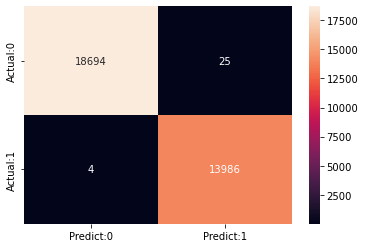

In [124]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

update_bestscore_card('RandomForest_train_with all 8 feature', y_train,train_pred)
update_bestscore_card('RandomForest_test_with all 8 feature', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))



cm= confusion_matrix(y_train,train_pred)
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

In [125]:
bestscore_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,RandomForest_train_with 7 feature,0.998619,0.997076,0.999428,0.998502,0.998251
1,RandomForest_test_with 7 feature,0.896944,0.847639,0.919615,0.893862,0.882161
2,RandomForest_train_with 6 feature,0.998146,0.996293,0.999071,0.998013,0.99768
3,RandomForest_test_with 6 feature,0.892838,0.841736,0.916785,0.889582,0.877659
4,RandomForest_train_with all 8 feature,0.999189,0.998216,0.999714,0.999113,0.998964
5,RandomForest_test_with all 8 feature,0.894542,0.842979,0.919332,0.891171,0.879502


# By looking the RFE all the 7 features are important 

### 'credit_limit', 'education', 'marital_status','age', 'avg_balance', 'avg_payment','timeliness'

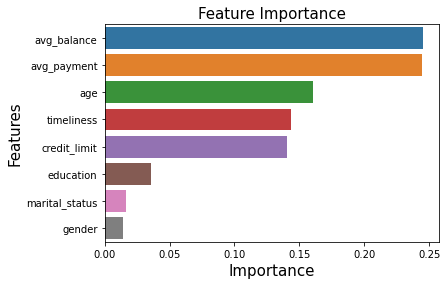

CPU times: total: 125 ms
Wall time: 259 ms


In [128]:
%%time
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# with 7 features

In [148]:
X_train7=X_train[['credit_limit', 'education', 'marital_status','age', 'avg_balance', 'avg_payment','timeliness']]#with 7 feature
X_test7=X_test[['credit_limit','education', 'marital_status' ,'age', 'avg_balance', 'avg_payment','timeliness']]#7

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4645
           1       0.85      0.92      0.88      3533

    accuracy                           0.89      8178
   macro avg       0.89      0.90      0.89      8178
weighted avg       0.90      0.89      0.89      8178

KNN CLASSIFIER:


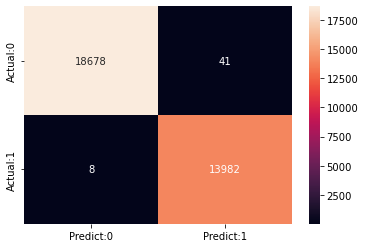

In [149]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model = rf.fit(X_train7, y_train)
train_pred = rf_model.predict(X_train7)
test_pred = rf_model.predict(X_test7)

update_bestscore_card('RandomForest_train_with 7 feature', y_train,train_pred)
update_bestscore_card('RandomForest_test_with 7 feature', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))



cm= confusion_matrix(y_train,train_pred)
print("RandomForest CLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');

In [154]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [220,250],
    'max_depth' : [8,10],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3,scoring  = "recall")
CV_rfc.fit(X_train7, y_train)
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 220}

TRAIN REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18719
           1       1.00      1.00      1.00     13990

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

TEST REPORT:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4645
           1       0.85      0.92      0.88      3533

    accuracy                           0.89      8178
   macro avg       0.89      0.90      0.89      8178
weighted avg       0.90      0.89      0.89      8178

RandomForest CLASSIFIER:


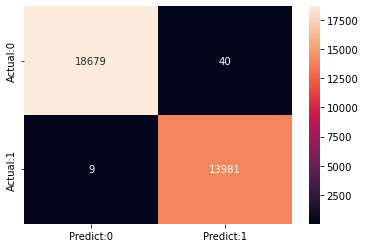

In [156]:
rf = RandomForestClassifier(n_estimators = 220, random_state = 42)
rf_model = rf.fit(X_train7, y_train)
train_pred = rf_model.predict(X_train7)
test_pred = rf_model.predict(X_test7)

update_bestscore_card('RandomForest_train_with 7 feature', y_train,train_pred)
update_bestscore_card('RandomForest_test_with 7 feature', y_test,test_pred)

print("TRAIN REPORT:\n",classification_report(y_train, train_pred))  
print("TEST REPORT:\n",classification_report(y_test, test_pred))



cm= confusion_matrix(y_train,train_pred)
print("RandomForest CLASSIFIER:")
matrix=pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predict:0','Predict:1'])
sns.heatmap(matrix,annot=True,fmt='d');